### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load data

In [2]:
census = pd.read_csv("../../data/census/census_county.csv")

# Removing missing rows with missing population values
census = census.drop(census[census.TotalPop == 0].index)

print("Shape of data", census.shape)
print("Columns", census.columns)
census.head()

Shape of data (3220, 37)
Columns Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


### Longest and Shortest County names

In [3]:
longest_county_name_on_census_dataset_index = np.argmax(census.County.map(len))
s_i = np.argmin(census.County.map(len))

census[(census.index == longest_county_name_on_census_dataset_index) | (census.index == s_i)]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
40,1081,Alabama,Lee,150982,74277,76705,3.7,68.2,23.0,0.1,...,2.2,1.0,3.1,21.7,68614,75.5,20.3,4.1,0.1,7.3
88,2198,Alaska,Prince of Wales-Hyder Census Area,6376,3468,2908,3.2,46.0,0.2,40.3,...,20.3,7.3,4.6,14.0,2819,50.4,37.7,11.8,0.1,13.9


### Largest income error

The income given can be off by as much as 21,355

In [4]:
max_income_err = np.argmax(census.IncomeErr)
max_income_err = census[census.index == max_income_err]

print(max_income_err.IncomeErr)
max_income_err

2657    21355.0
Name: IncomeErr, dtype: float64


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2657,48269,Texas,King,267,136,131,24.7,75.3,0.0,0.0,...,7.8,0.0,3.6,11.6,166,72.9,21.1,6.0,0.0,5.1


### Largest Income per cap error

The per capita income can be off by as much as 15,266.  I wonder if this indicates high income inequality

In [6]:
max_per_cap_err = np.argmax(census.IncomePerCapErr)
max_per_cap_err = census[census.index == max_per_cap_err]

print(max_per_cap_err.IncomePerCapErr)
max_per_cap_err

2539    15266
Name: IncomePerCapErr, dtype: int64


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2539,48033,Texas,Borden,705,362,343,8.8,87.9,0.0,3.0,...,0.7,0.7,9.6,24.9,282,45.7,36.2,17.0,1.1,0.7


### Gender imbalance

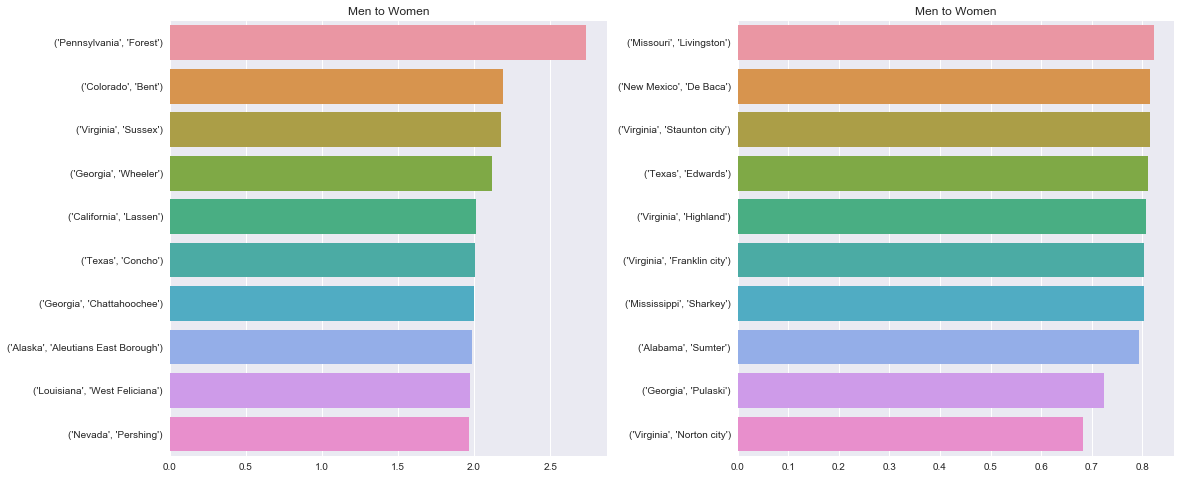

In [10]:
census["Men to women"] = census.Men / census.Women
ratio = census.groupby(["State", "County"])["Men to women"].median().sort_values(ascending=False)

fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(wspace=0.3)

data = ratio.head(10)
sns.barplot(x=data.values, y=data.index, ax=axarr[0]).set(title="Men to Women")

data = ratio.tail(10)
_ = sns.barplot(x=data.values, y=data.index, ax=axarr[1]).set(title="Men to Women")

# Selected Counties

### Counties in California

In [7]:
state = "California"
census[census.State == state].County.value_counts().head(20)

Mendocino         1
Riverside         1
Plumas            1
San Benito        1
San Bernardino    1
Santa Clara       1
Inyo              1
San Joaquin       1
Stanislaus        1
Contra Costa      1
Tuolumne          1
Monterey          1
Solano            1
Sacramento        1
Calaveras         1
Lake              1
Mono              1
Modoc             1
Colusa            1
Placer            1
Name: County, dtype: int64

### Overview

In [8]:
counties = ["Santa Clara", "San Diego", "Monterey", "Alameda", "San Francisco", "Contra Costa", "Los Angeles"]

commute, income, income_percap, men, women = ([],[],[],[],[])
hispanic, white, black, native, asian, pacific = ([],[],[],[],[],[])

for county in counties:
    curr_county = census[census.County == county]

    commute.append(curr_county.MeanCommute.median())
    men.append(curr_county.Men.sum() / 1000)
    women.append(curr_county.Women.sum() / 1000)
    hispanic.append(((curr_county.Hispanic * curr_county.TotalPop) / 100000).sum())
    white.append(((curr_county.White * curr_county.TotalPop) / 100000).sum())
    black.append(((curr_county.Black * curr_county.TotalPop) / 100000).sum())
    native.append(((curr_county.Native * curr_county.TotalPop) / 100000).sum())
    asian.append(((curr_county.Asian * curr_county.TotalPop) / 100000).sum())
    pacific.append(((curr_county.Pacific * curr_county.TotalPop) / 100000).sum())
    income.append(curr_county.Income.median())
    income_percap.append(curr_county.IncomePerCap.median())

counties = pd.DataFrame({
                "Women": women,
                "Men": men,
                "Median Commute": commute,
                "Hispanic": hispanic,
                "White": white,
                "Black": black,
                "Native": native,
                "Asian": asian,
                "Pacific": pacific,
                "IncomePerCap": income_percap,
                "Income": income
            }, index=counties)

counties["Men to women"] = counties.Men / counties.Women
counties.head()

,Asian,Black,Hispanic,Income,IncomePerCap,Median Commute,Men,Native,Pacific,White,Women,Men to women
Santa Clara,625.829915,44.835576,496.927634,96310.0,43880.0,26.3,939.004,3.736298,5.604447,627.698064,929.145,1.010611
San Diego,360.986752,151.485512,1060.398584,64309.0,31266.0,25.0,1618.945,12.892384,12.892384,1514.855120,1604.151,1.009222
Monterey,25.278019,11.139466,243.782929,58783.0,24994.0,22.3,219.299,1.285323,2.142205,134.958915,209.142,1.048565
Alameda,435.870325,179.103079,358.206158,75619.0,37285.0,30.7,776.699,4.754949,12.679864,523.044390,808.284,0.960923
San Francisco,281.655605,44.560439,128.636739,81294.0,52220.0,31.7,427.909,1.681526,3.363052,346.394356,412.854,1.036466


### Selected County Comparison

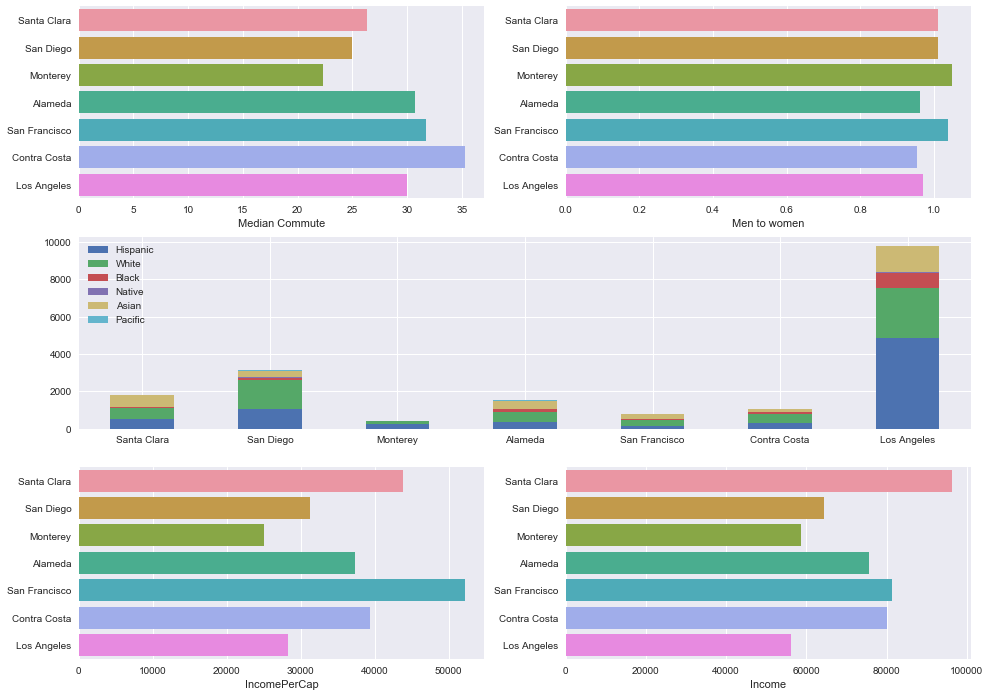

In [9]:
plt.figure(figsize=(16, 12))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax4 = plt.subplot2grid((3, 2), (2, 0))
ax5 = plt.subplot2grid((3, 2), (2, 1))

sns.barplot(counties["Median Commute"], counties.index, ax=ax1)
sns.barplot(counties["Men to women"], counties.index, ax=ax2)

races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
counties[races].plot(kind="bar", stacked=True, ax=ax3, rot=0)

sns.barplot(counties["IncomePerCap"], counties.index, ax=ax4)
_ = sns.barplot(counties["Income"], counties.index, ax=ax5)

### Commute Times

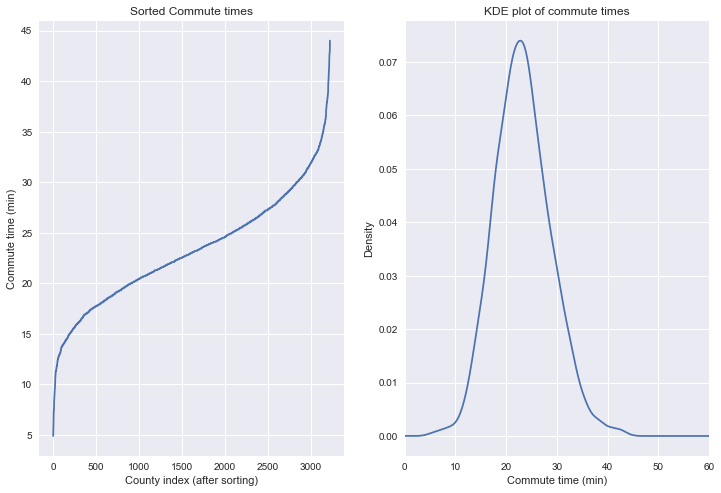

In [11]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

commute_times = census.groupby(["State", "County"])["MeanCommute"].median().sort_values().values
axarr[0].plot(commute_times)
axarr[0].set(title="Sorted Commute times", xlabel="County index (after sorting)", ylabel="Commute time (min)")

_ = (
        census
            .groupby(["State", "County"])["MeanCommute"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of commute times", xlabel="Commute time (min)", xlim=(0,60))
)

### Income

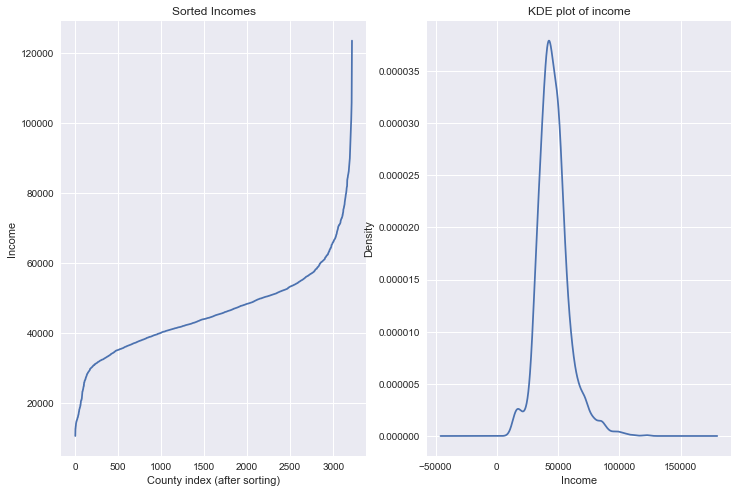

In [12]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

income = census.groupby(["State", "County"])["Income"].median().sort_values().values
axarr[0].plot(income)
axarr[0].set(title="Sorted Incomes", xlabel="County index (after sorting)", ylabel="Income")

_ = (
        census
            .groupby(["State", "County"])["Income"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of income", xlabel="Income")
)

### Commute times

WARNING: barplots take around 1min to load on my laptop

In [13]:
high_times = census[census.MeanCommute > 40].groupby(["State", "County"])
mid_times = census[(census.MeanCommute < 40) & (census.MeanCommute > 10)].groupby(["State", "County"])
low_times  = census[census.MeanCommute < 10].groupby(["State", "County"])
print(len(low_times), len(mid_times), len(high_times))

22 3180 18


### FIXME: These don't add to 100?

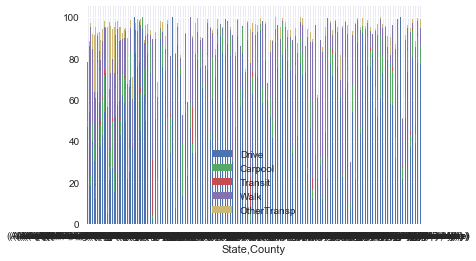

In [14]:
trans = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
c = {trans[i]: flatui[i] for i in range(5)}

plt.figure(figsize=(16, 8))

low_times[trans].median() .plot(kind="bar", stacked=True, rot=0)


# counties[races].plot(kind="bar", stacked=True, ax=ax3, rot=0)

# for tran in trans:
#     plt.bar("Short commutes (< 10min)", low_times[tran].median(), width=0.25, align="center", label=tran, color=c[tran])
#     plt.bar("Mid commutes", mid_times[tran].median(), width=0.25, align="center", color=c[tran])
#     plt.bar("Long commutes (> 40min)", high_times[tran].median(), width=0.25, align="center", color=c[tran])
  
# _ = plt.legend(bbox_to_anchor=(0.3, 0.3))

### Work based on income

In [165]:
high_income = census[census.Income > 80000].groupby(["State", "County"])
mid_income = census[(census.Income < 80000) & (census.Income > 32000)].groupby(["State", "County"])
low_income  = census[census.Income < 32000].groupby(["State", "County"])
print(len(low_income), len(mid_income), len(high_income))

1660 3094 675


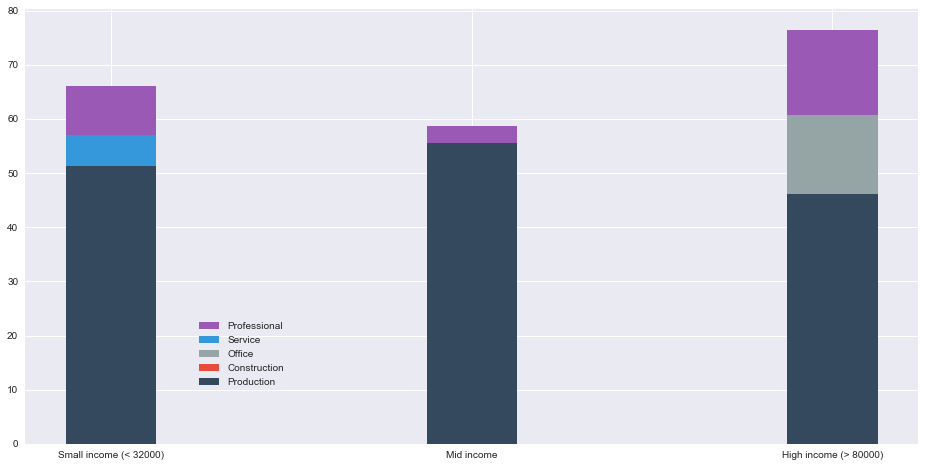

In [166]:
works = [ 'Professional', 'Service', 'Office', 'Construction','Production']
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
c = {works[i]: flatui[i] for i in range(5)}

plt.figure(figsize=(16, 8))
for work in works:
    plt.bar("Small income (< 32000)", low_income[work].median(), width=0.25, align="center", label=work, color=c[work])
    plt.bar("Mid income", mid_income[work].median(), width=0.25, align="center", color=c[work])
    plt.bar("High income (> 80000)", high_income[work].median(), width=0.25, align="center", color=c[work])
  
_ = plt.legend(bbox_to_anchor=(0.3, 0.3))

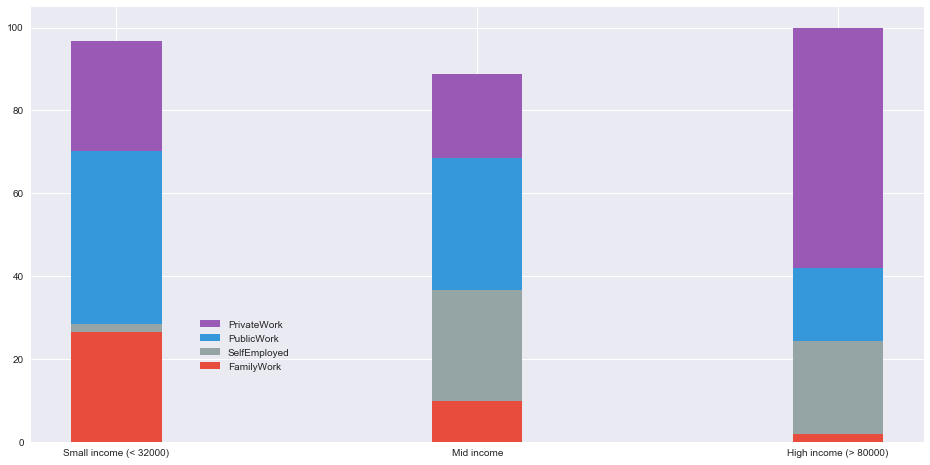

In [167]:
works = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
c = {works[i]: flatui[i] for i in range(4)}

plt.figure(figsize=(16, 8))
for work in works:
    plt.bar("Small income (< 32000)", low_income[work].median(), width=0.25, align="center", label=work, color=c[work])
    plt.bar("Mid income", mid_income[work].median(), width=0.25, align="center", color=c[work])
    plt.bar("High income (> 80000)", high_income[work].median(), width=0.25, align="center", color=c[work])
  
_ = plt.legend(bbox_to_anchor=(0.3, 0.3))